In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

In [26]:
mol_str = """
Li
H 1 1.8
symmetry c1
"""

options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

cavity_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'cas',
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
    'nact_els' : 4,
    'nact_orbs' : 6
}

mol = psi4.geometry(mol_str)

psi4.set_options(options_dict)

test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)
mol = psi4.geometry(mol_str)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)


print(test_pf.nmo)
#fci_energy = psi4.energy('fci',ref_wfn=wfn)

#assert np.isclose(fci_energy, test_pf.CIeigs[0], 1e-9)
#print(fci_energy)
print(test_pf.CIeigs[0])


Start SCF iterations:

Canonical RHF One-electron energy = -12.2161423092107739
CQED-RHF One-electron energy      = -12.2161423092107739
Nuclear repulsion energy          = 0.8819620177833333
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9821109353952977   dE = -7.98211E+00   dRMS = 9.23805E-12
SCF Iteration   2: Energy = -7.9821109353952941   dE =  3.55271E-15   dRMS = 2.92946E-12
Total time for SCF iterations: 0.003 seconds 

QED-RHF   energy: -7.98211094 hartree
Psi4  SCF energy: -7.98211094 hartree
 Completed QED-RHF in 0.16221404075622559 seconds
 Completed 1HSO Build in 0.0012159347534179688 seconds
 Completed ERI Build in 0.027899980545043945 seconds 
 Completed 2D build in 0.024544954299926758 seconds
 Completed 1G build in 8.606910705566406e-05 seconds
 Completed the Dipole Matrix Build in 0.0008749961853027344 seconds
Generating all determinants in active space
 Completed determinant list in 0.0017542839050292969 seconds 
 Completed co

In [27]:
n_act = [4,5,6,7,8,9,10]
en = [-7.978452515572831,-7.9785743078660225,-7.981111350958631,-7.981346440563342,-7.981636784399326,
     -7.981920181264183,-7.988070377253409]

end = [-7.981935045207551,-7.981974014664961,-7.982881432325026,-7.982948679601316,-7.983243847852737,-7.983529760769239,-7.986551079054769]

n_actdd = [4,5,6]
endd = [-7.982256711468253, -7.982296786429204, -7.983210430915704]

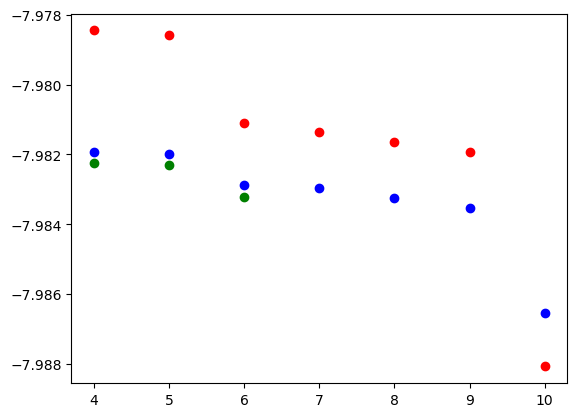

In [29]:
from matplotlib import pyplot as plt
plt.plot(n_act, en, 'ro')
plt.plot(n_act, end, 'bo')
plt.plot(n_actdd, endd, 'go')

In [4]:
lih_631gs = test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)

options_dict["basis"] = "6-31G"

lih_631g = test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)



Start SCF iterations:

Canonical RHF One-electron energy = -12.2113302892017845
CQED-RHF One-electron energy      = -12.2113302892017845
Nuclear repulsion energy          = 0.8819620177833333
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9781479594674565   dE = -7.97815E+00   dRMS = 3.10983E-13
SCF Iteration   2: Energy = -7.9781479594674778   dE = -2.13163E-14   dRMS = 8.41325E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.97814796 hartree
Psi4  SCF energy: -7.97814796 hartree
 Completed QED-RHF in 0.14539694786071777 seconds
 Completed 1HSO Build in 0.00018405914306640625 seconds
 Completed ERI Build in 0.008723020553588867 seconds 
 Completed 2D build in 0.006048917770385742 seconds
 Completed 1G build in 8.296966552734375e-05 seconds
 Completed the Dipole Matrix Build in 0.00030684471130371094 seconds
Generating all determinants in active space
 Completed determinant list in 0.00658416748046875 seconds 
 Completed co

IndexError: index 13 is out of bounds for axis 0 with size 12

In [8]:
lih_631gs_singlets = lih_631gs.sort_dipole_allowed_states(20)
lih_631g_singlets = lih_631g.sort_dipole_allowed_states(20)



print(lih_631g.CIeigs[lih_631gs_singlets]-lih_631gs.CIeigs[lih_631g_singlets])

[ 0.00092382  0.00165969  0.00139725  0.00170569  0.00201259  0.00582429
  0.00626855 -0.00766678 -0.00870199 -0.00728817 -0.00672652 -0.00569446
 -0.00137056 -0.00452657 -0.00149124 -0.00871205 -0.00149707 -0.00612422
 -0.00341278  0.00077997]


In [ ]:
#fci_energy = psi4.energy('fci',ref_wfn=wfn)

#assert np.isclose(fci_energy, test_pf.CIeigs[0], 1e-9)
#assert np.isclose(fci_energy, test_pf.CIeigs[0], 1e-7)
print(test_pf.CIeigs[:8])

print(test_pf.nmo)

In [ ]:


mol_str = """
Li
H 1 1.8
symmetry c1
"""

N_R = 50
N_el = 50
#r_array = np.linspace(1.4, 2.2, N_R)

E_array = np.zeros(N_el)
Mu_array = np.zeros((N_el, N_el, 3))
psi4.set_options(options_dict)


print(mol_str)
mol = psi4.geometry(mol_str)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy = psi4.energy('fci',ref_wfn=wfn)

LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
assert np.isclose(fci_energy, LiH.CIeigs[0], 1e-7)
# sort out states with dipole-allowed transition from ground state
singlet_states = LiH.sort_dipole_allowed_states(N_el)
E_array = LiH.CIeigs[singlet_states]
Mu_array[:, :, :] = LiH.compute_dipole_moments(singlet_states)
    




In [ ]:
print(Mu_array[:, :, :])

In [ ]:
from matplotlib import pyplot as plt


\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [ ]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF
                
            
    
        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [ ]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = E_array[1]-E_array[0]
lambda_vector = np.array([0, 0.0, 0.05])
print(omega_cav)

In [ ]:
N_el = 3
N_ph = 3

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array, omega_cav, lambda_vector, Mu_array[:, :, :])
print("H")
print(_HPF)

We want to investigate the mean absolute error of a given polariton potential energy surface as a 
function of electronic and photonic truncation:

$$ {\rm MAE} = \frac{1}{N_R} \sum_i^{N_R} \left| E(R_i) - E^{'}(R_i) \right| $$

where $E^{'}(R_i)$ is a value of the polaritonic PES for a truncated level of theory and $E(R_i)$ is the exact value.

In [ ]:
def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR

    

In [ ]:
lam_z = np.linspace(0, 1, 50)
pol_v_l = np.zeros((50,3))
print(lam_z)

In [ ]:
N_el = 40
N_ph = 40
for i in range(50):
    lambda_vector[2] = lam_z[i]           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array, omega_cav, lambda_vector, Mu_array[:, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pol_v_l[i,:] = pf_e[:3]
    print(lam_z[i], pf_e[0], pf_e[1], pf_e[2])

In [ ]:
plt.plot(lam_z, pol_v_l[:,0], label='g')
plt.plot(lam_z, trunc_pol_v_l[:,0], label='tg')
plt.plot(lam_z, pol_v_l[:,1], label='LP')
plt.plot(lam_z, trunc_pol_v_l[:,1], label='tlp')
plt.plot(lam_z, pol_v_l[:,2], label='UP')
plt.plot(lam_z, trunc_pol_v_l[:,2], label='tup')

plt.legend()
plt.show()